In [2]:
import pandas as pd 
import yfinance as yf
import numpy as np

## Stock Universe 

Get the stocks from S&P 500 that were there in 2018. We choose this year to avoid Covid pandemic in 2020

In [28]:
import yfinance as yf
import pandas as pd

# Define a function to get market cap for a list of tickers
def get_market_caps(tickers):
    """ 
    Parameters:
    tickers : list
        List of tickers
    Returns:
    market_caps : dict
        Dictionary with market cap for each ticker
    """
    market_caps = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            market_cap = stock.info['marketCap']
            market_caps[ticker] = market_cap
        except Exception as e:
            pass
    return market_caps

# List of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=828491336')[0]['Ticker symbol'].tolist()

# Get market caps for the tickers
market_caps = get_market_caps(sp500_tickers)

# Create a DataFrame and sort by market cap
market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])
market_caps_df = market_caps_df.sort_values(by='MarketCap', ascending=False)

# Get the top 200 companies by market cap
top_200_companies = market_caps_df.head(200)

# Save to a CSV file
top_200_companies.to_csv('top_200_companies_by_market_cap.csv', index=False)

print("Top 200 companies by market cap saved to 'top_200_companies_by_market_cap.csv'")


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=cRilF3%2F00Cc
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=cRilF3%2F00Cc
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARNC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARNC&crumb=cRilF3%2F00Cc
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.

Top 200 companies by market cap saved to 'top_200_companies_by_market_cap.csv'


In [ ]:
# read the csv file
top_200_companies = pd.read_csv('top_200_companies_by_market_cap.csv')

In [30]:
top_200_companies.columns

Index(['Ticker', 'MarketCap'], dtype='object')

In [44]:
def get_data(tickers, start="2018-01-01", end="2020-01-01"):
    """
    Parameters:
    tickers : list
        List of tickers
    start : str
        Start date for data retrieval
    end : str
        End date for data retrieval
    Returns:
    data : pandas.DataFrame
        Dataframe with stock Adj Close for each ticker
    """
    data = yf.download(tickers, start=start, end=end,progress=False)['Adj Close']
    return data

prices = get_data(top_200_companies['Ticker'].tolist())


In [34]:
prices.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.401207,40.615879,72.923515,52.293571,139.224014,177.699997,79.776627,101.141068,107.120003,57.495674,...,152.910004,37.791500,49.701855,50.626553,76.704010,21.156818,29.339251,62.133778,72.576630,68.448677
2018-01-03,66.039833,40.608818,74.064674,52.409206,139.866547,181.039993,80.766319,102.239784,109.379997,57.011307,...,152.009995,37.014915,49.787243,51.016048,77.817627,21.741112,29.595181,63.354084,72.514389,68.763428
2018-01-04,65.544441,40.797432,73.642296,52.320255,141.522690,183.220001,80.677971,103.216393,112.070000,56.336365,...,153.070007,37.134937,48.716034,51.654171,78.485764,22.114786,29.621960,63.441788,73.252602,69.173508
2018-01-05,66.592400,41.261932,74.924240,52.471481,142.690125,185.339996,81.004890,103.155350,110.839996,56.217266,...,155.690002,37.050220,48.413311,52.002235,78.387764,22.053642,29.797544,63.390625,73.679512,69.965118
2018-01-08,66.735291,41.108677,73.723808,52.320255,143.830399,185.039993,81.146317,102.841431,111.419998,56.709560,...,156.889999,36.986675,48.584091,51.413826,78.441231,22.135168,30.237970,63.675617,73.804031,70.804382


In [45]:
# resample prices to get month end prices
def get_month_end_prices(prices):
    """ 
    Parameters:
    prices : DataFrame
        Prices for each ticker and date
    Returns:
    prices_month_end : DataFrame
        Prices for each ticker and month end date
    """
    prices_month_end = prices.resample('M').last()
    return prices_month_end

prices_month_end = get_month_end_prices(prices)
prices_month_end.head()

/tmp/ipykernel_2481244/3640819565.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return prices.resample('M').last()


Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,69.955345,39.477051,83.753448,55.555592,145.432281,199.759995,81.190475,107.803040,115.620003,54.613319,...,166.869995,38.607529,46.550377,54.513237,78.779755,21.326672,31.722931,63.792530,75.236000,73.299469
2018-02-28,65.344376,42.168808,86.447723,53.920044,145.712830,209.130005,79.661736,100.556839,117.470001,52.578232,...,166.029999,34.087723,41.401173,48.694294,76.900024,18.860415,26.785946,55.911270,72.716286,77.244812
2018-03-31,63.734352,39.720871,70.640388,53.553593,138.916321,216.080002,80.946671,99.496620,125.580002,54.991470,...,162.979996,34.144844,42.923157,43.692299,75.350868,17.101875,26.634304,55.077103,76.067070,79.776344
2018-04-30,62.769035,39.124279,72.804825,52.203861,138.042328,221.600006,77.589073,103.529785,125.900002,56.105892,...,153.160004,35.680683,42.142445,43.317154,72.815865,17.700375,26.481634,57.395054,77.827316,79.864723
2018-05-31,59.121666,44.410904,74.606995,55.257236,142.187241,249.279999,86.320618,113.998505,129.100006,54.985283,...,154.000000,34.466026,46.177540,45.348358,74.087845,18.477734,24.865067,60.579231,72.985893,80.075188


## Momentum Strategy

For now lets consider the log return for each month of a ticker as momentum indicator. We get top 50 and bottom 50performers for each month. We go long on top performers and short on bottom performers with equal money allocation.

In [46]:
# get log returns for monthly data
def get_monthly_log_returns(monthly_prices):
    """ 
    Parameters
    ----------
    monthly_prices : DataFrame
        Close prices for each ticker and date
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    log_retuns = np.log(monthly_prices).diff()
    return log_retuns

monthly_close_returns = get_monthly_log_returns(prices_month_end)
monthly_close_returns.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.068186,0.065961,0.031663,-0.029882,0.001927,0.045839,-0.019009,-0.069583,0.015874,-0.037976,...,-0.005047,-0.124510,-0.117226,-0.112882,-0.024150,-0.122893,-0.169162,-0.131870,-0.034064,0.052426
2018-03-31,-0.024948,-0.059804,-0.201938,-0.006819,-0.047766,0.032693,0.016001,-0.010599,0.066760,0.044876,...,-0.018541,0.001674,0.036102,-0.108390,-0.020351,-0.097877,-0.005677,-0.015032,0.045050,0.032247
2018-04-30,-0.015262,-0.015134,0.030180,-0.025526,-0.006311,0.025225,-0.042364,0.039736,0.002545,0.020063,...,-0.062144,0.043998,-0.018356,-0.008623,-0.034222,0.034398,-0.005749,0.041224,0.022877,0.001107
2018-05-31,-0.059864,0.126742,0.024452,0.056843,0.029584,0.117703,0.106642,0.096326,0.025099,-0.020175,...,0.005469,-0.034635,0.091438,0.045825,0.017318,0.042981,-0.062988,0.053994,-0.064226,0.002632


<Axes: xlabel='Date', ylabel='AAPL monthly log returns'>

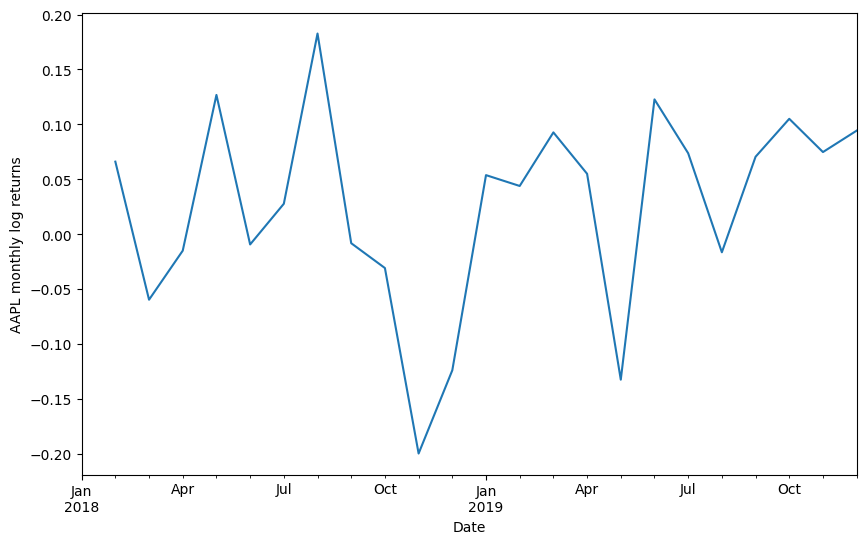

In [47]:
monthly_close_returns.loc[:, 'AAPL'].plot(figsize=(10, 6),ylabel='AAPL monthly log returns')

In [49]:
# define function that give shifted returns for each ticker
def shift_returns(returns, shift_n):
    """ 
    Parameters:
    returns : pd.DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    Returns: 
    shifted: pd.DataFrame
        Shifted returns for each ticker
    """
    shifted = returns.shift(shift_n)
    return shifted

# shift returns
shifted_monthly_close_returns = shift_returns(monthly_close_returns, 1)
shifted_monthly_close_returns.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-0.068186,0.065961,0.031663,-0.029882,0.001927,0.045839,-0.019009,-0.069583,0.015874,-0.037976,...,-0.005047,-0.124510,-0.117226,-0.112882,-0.024150,-0.122893,-0.169162,-0.131870,-0.034064,0.052426
2018-02-28,-0.024948,-0.059804,-0.201938,-0.006819,-0.047766,0.032693,0.016001,-0.010599,0.066760,0.044876,...,-0.018541,0.001674,0.036102,-0.108390,-0.020351,-0.097877,-0.005677,-0.015032,0.045050,0.032247
2018-03-31,-0.015262,-0.015134,0.030180,-0.025526,-0.006311,0.025225,-0.042364,0.039736,0.002545,0.020063,...,-0.062144,0.043998,-0.018356,-0.008623,-0.034222,0.034398,-0.005749,0.041224,0.022877,0.001107
2018-04-30,-0.059864,0.126742,0.024452,0.056843,0.029584,0.117703,0.106642,0.096326,0.025099,-0.020175,...,0.005469,-0.034635,0.091438,0.045825,0.017318,0.042981,-0.062988,0.053994,-0.064226,0.002632
2018-05-31,-0.001293,-0.009463,-0.065684,-0.008815,0.049175,-0.022188,-0.008338,0.036278,0.015297,0.018951,...,0.098611,0.053902,0.083812,0.026503,-0.011137,0.022331,0.036986,0.018175,-0.038989,0.017645


In [106]:
# function to get top industries for a given date and sector

def get_top_n(prev_monthly_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_monthly_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """

    # interate over each date and get top industries for each date
    top_stocks = pd.DataFrame(columns=prev_monthly_returns.columns)
    for date, tickers in prev_monthly_returns.iterrows():
        # print(row[1].nlargest(5))
        # get top tickers for the date
        top_tickers = tickers.loc[:].nlargest(top_n)
        # print(top_tickers.index.tolist())
        # for top_stocks tickers put the value 1 for rest 0
        signal = [1 if ticker in top_tickers.index.tolist() else 0 for ticker in tickers.index.tolist()]

        top_stocks.loc[date] = signal
        
    return top_stocks
  
# get long and short holdings
long_df = get_top_n(shifted_monthly_close_returns, 50)
short_df = get_top_n(shifted_monthly_close_returns, -50)


In [108]:
long_df.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
2018-01-31,0,1,1,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2018-02-28,0,0,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,1,1
2018-03-31,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2018-04-30,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2018-05-31,0,0,0,0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
